<span style="color:blue">1. PARAMETRAGE</span>

<span style="color:blue">A. Importations de librairies</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pip

<span style="color:blue">B. Installation d'un nouveau package depuis Jupyter en utilisant un gestionnaire de package</span>

In [2]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


<span style="color:blue">C. Vérifications des numéros de version ainsi que les packages installés</span>

In [3]:
!pip list

Package                           Version
--------------------------------- ------------
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-catalogs                 0.2.0
anyio                             4.2.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
async-lru                         2.0.4
async-timeout                     4.0.3
atomicwrites                      1.4.0
attrs                             23.1.0
Automat                           20.2.0
autopep8                          2.0.4
Babel                             2.11.0
bcrypt                  

<span style="color:blue">2. CHARGEMENT DU JEU DE DONNEES</span>

In [4]:
data = pd.read_csv("p2-arbres-fr.csv", sep=";")

<span style="color:blue">3. EXPLORATION DU JEU DE DONNEES</span>

<span style="color:blue">A. Affichage des cinq premières lignes du DataFrame :</span>

In [5]:
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


<span style="color:blue">B. Affichage du nombre de lignes et de colonnes dans le Data Frame :</span>

In [6]:
print("Nombre de colonnes :", data.shape[1])
print("Nombre de lignes :", data.shape[0])

Nombre de colonnes : 18
Nombre de lignes : 200137


<span style="color:blue">C. Affichage des types de données de chaque colonne :</span>

In [7]:
print("Types de données :")
data.dtypes

Types de données :


id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

 <span style="color:blue">D. Affichage des statistiques descriptives pour chaque colonne numérique (moyenne, médiane, min, max, écart-type, etc.) </span>

In [8]:
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

<span style="color:blue">E. Affichage du nombres de valeurs uniques pour chaque colonne</span>

In [10]:
data.nunique()

id                     200137
type_emplacement            1
domanialite                 9
arrondissement             25
complement_addresse      3795
numero                      0
lieu                     6921
id_emplacement          69040
libelle_francais          192
genre                     175
espece                    539
variete                   436
circonference_cm          531
hauteur_m                 143
stade_developpement         4
remarquable                 2
geo_point_2d_a         200107
geo_point_2d_b         200114
dtype: int64

<span style="color:blue">F. Affichage du nombre de valeurs uniques pour chaque colonne catégorielle :</span>

In [11]:
data.select_dtypes(include=['object']).apply(pd.Series.value_counts)

,type_emplacement,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,stade_developpement
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00010238b,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
00010264 /,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
00010270 /,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
00010271 /,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
à côté de l'arrêt de bus appartement 29e,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
à côté passerelle,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
à gauche de l'entrée principale,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
école militaire,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:blue">G. Affichage du pourcentage de valeurs manquantes par colonne :</span>

In [12]:
(data.isnull().mean() * 100).astype(int)

id                       0
type_emplacement         0
domanialite              0
arrondissement           0
complement_addresse     84
numero                 100
lieu                     0
id_emplacement           0
libelle_francais         0
genre                    0
espece                   0
variete                 81
circonference_cm         0
hauteur_m                0
stade_developpement     33
remarquable             31
geo_point_2d_a           0
geo_point_2d_b           0
dtype: int64

<span style="color:blue">H. Affichage du nombre de lignes qui ont des valeurs manquantes :</span>

In [13]:
(data.isnull().sum(axis=1) > 0).sum()

200137

<span style="color:blue">Première suggestion sur les colonnes prioritaires pour notre objectifs:</span>

- Espèce (pour l'entretien)
- Hauteur (Pour l'élagage)
- Stade de développement (Pour l'arrosage)
- Circonférence du tron (Pour l'élagage)
- Arrondissemet (pour la localisation)

<span style="color:blue">Première suggestion sur les colonnes à ne pas prendre en compte (trop de valeurs manquantes):</span>

- Complement d'addresse (84%)
- Numero (100%)
- variete (81%)

<span style="color:blue">Nous verrons quelles solution adopter lors du nettoyage du jeu de données.</span>

<span style="color:blue">Nous allons analyser la fréquence de chaque espèce d'arbre dans notre jeu de données. Une répartition inégale pourrait indiquer que certaines espèces d'arbres nécessitent plus d'entretien que d'autres)</span>n )

In [14]:
# Compter la fréquence de chaque espèce d'arbre
freq_espece = data['espece'].value_counts()

# Créer un DataFrame pour stocker les fréquences des espèces d'arbres
stats_espece = pd.DataFrame({'Espèce': freq_espece.index,
                             'Fréquence': freq_espece.values})

stats_espece

,Espèce,Fréquence
0,x hispanica,36409
1,hippocastanum,20039
2,japonica,11822
3,n. sp.,9063
4,tomentosa,8962
...,...,...
534,cissifolium,1
535,bipinnata,1
536,americanum,1
537,velutina,1


<span style="color:blue">Nous allons examiner la distribution de la hauteur des arbres. Des arbres plus grands peuvent nécessiter un entretien plus fréquent ou plus spécialisé.</span>

In [15]:
# Nombre total d'arbres
total_arbres = data['hauteur_m'].count()

# Hauteur minimale des arbres
hauteur_min = data['hauteur_m'].min()

# Hauteur maximale des arbres
hauteur_max = data['hauteur_m'].max()

# Hauteur moyenne des arbres
hauteur_moy = data['hauteur_m'].mean()

# Création d'un DataFrame pour stocker les statistiques de la hauteur des arbres
stats_hauteur = pd.DataFrame({'Total d\'arbres': [total_arbres],
                              'Hauteur minimale (m)': [hauteur_min],
                              'Hauteur maximale (m)': [hauteur_max],
                              'Hauteur moyenne (m)': [hauteur_moy]})

stats_hauteur

,Total d'arbres,Hauteur minimale (m),Hauteur maximale (m),Hauteur moyenne (m)
0,200137,0,881818,13.110509


<span style="color:blue">Nous allons examiner le stade de developpement</span>

In [16]:
# Créer un dictionnaire de correspondance pour les stades de développement
correspondance_stades = {'A': 'Adulte', 'JA': 'Jeune adulte', 'J': 'Jeune', 'M': 'Mature'}

# Mapper les valeurs des stades de développement avec les noms complets
data['stade_complet'] = data['stade_developpement'].map(correspondance_stades)

# Compter le nombre d'arbres par stade de développement
arbres_par_stade = data['stade_complet'].value_counts()

# Créer un DataFrame pour stocker les nombres d'arbres par stade de développement
stats_stade_developpement = pd.DataFrame({'Stade de développement': arbres_par_stade.index,
                                          'Nombre d\'arbres': arbres_par_stade.values})

stats_stade_developpement

,Stade de développement,Nombre d'arbres
0,Adulte,64438
1,Jeune adulte,35444
2,Jeune,26937
3,Mature,6113


<span style="color:blue">Nous allons examiner la circonferance des trons</span>

In [17]:
# Création d'un DataFrame pour stocker les statistiques de la circonférence des troncs
stats_circonf = pd.DataFrame({'Statistiques': ['Minimum', 'Maximum', 'Moyenne'],
                              'Valeurs': [data['circonference_cm'].min(), data['circonference_cm'].max(), data['circonference_cm'].mean()]})

stats_circonf

,Statistiques,Valeurs
0,Minimum,0.000000
1,Maximum,250255.000000
2,Moyenne,83.380479


<span style="color:blue">Nous allons compter le nombre d'arbres dans chaque arrondissement. Un arrondissement avec un grand nombre d'arbres peut nécessiter plus de tournées d'entretien.</span>

In [18]:
# Compter la fréquence de chaque arrondissement
freq_arrondissement = data['arrondissement'].value_counts()

# Créer un DataFrame pour stocker les fréquences des arrondissements
stats_arrondissement = pd.DataFrame({'Arrondissement': freq_arrondissement.index,
                                     'Fréquence': freq_arrondissement.values})

stats_arrondissement

,Arrondissement,Fréquence
0,PARIS 15E ARRDT,17151
1,PARIS 13E ARRDT,16712
2,PARIS 16E ARRDT,16403
3,PARIS 20E ARRDT,15340
4,PARIS 19E ARRDT,13709
5,PARIS 12E ARRDT,12600
6,SEINE-SAINT-DENIS,11570
7,BOIS DE VINCENNES,11510
8,PARIS 14E ARRDT,11399
9,PARIS 17E ARRDT,10762


<span style="color:blue">4. NETTOYAGE DU JEU DE DONNEES</span>

<span style="color:blue">A. Detection des valeurs manquantes :</span>

In [19]:
missing_values = data.isnull().sum()
print(missing_values)

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
stade_complet           67205
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

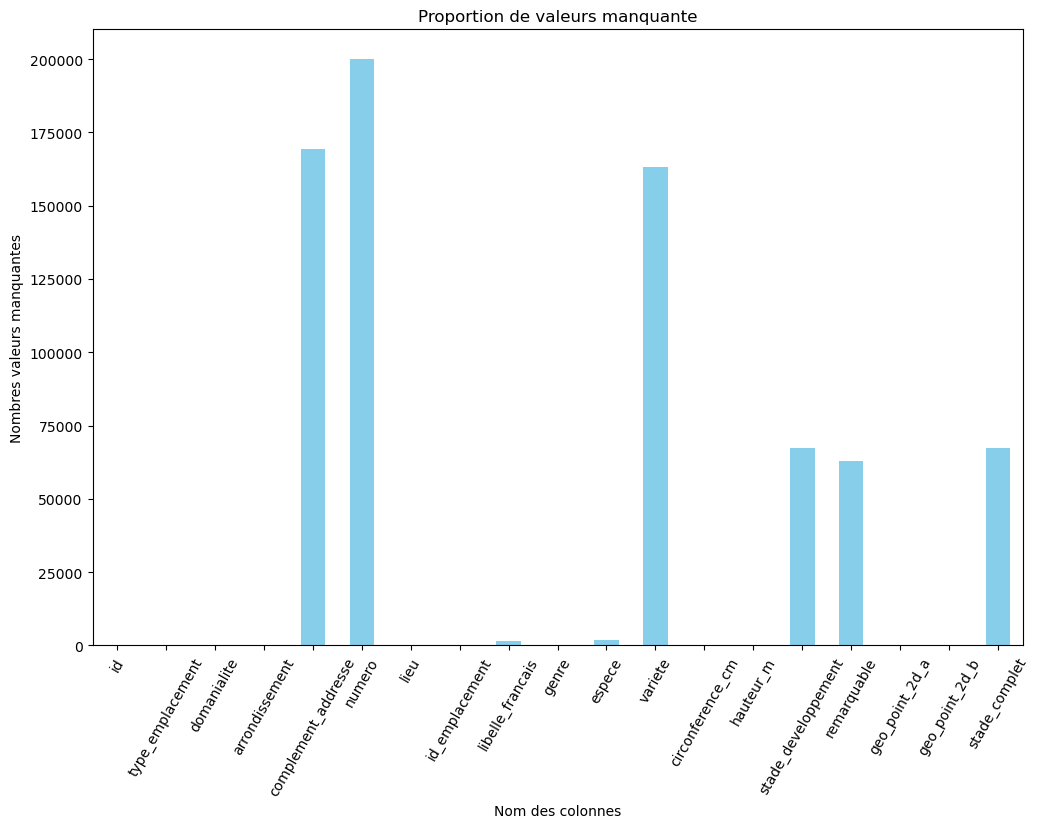

In [20]:
# Vue graphique des valeurs null par colonne
valeur_manquante = data.isnull().sum()

plt.figure(figsize=(12, 8))
valeur_manquante.plot(kind="bar", color="skyblue")

plt.title("Proportion de valeurs manquante")
plt.xlabel("Nom des colonnes")
plt.xticks(rotation = 60)
plt.ylabel("Nombres valeurs manquantes")

plt.show

<span style="color:blue">B. Gestion des valeurs manquantes :</span>

<span style="color:blue">Pour realise notre objectif nous estimons les colonnes importante suivantes : espèce, hauteur, stade de développement, circonférence du tronc et d'arrondissement.</span>

<span style="color:blue">Nous pouvons observer que nous avons des valeurs manquantes pour : Espece et stade de développement</span>

<span style="color:blue">Nous allons donc gérer ces valeurs manquantes en remplacent les valeurs manquantes dans les colonnes "Espèce" et "Stade Developpement" par les valeurs "Inconnu" et "non spécifié" respectivement </span>ement.

In [21]:
# Gestion des valeurs manquantes
# Remplacement des valeurs manquantes dans les colonnes "Espece" et "Stade_developpement"
data['espece'].fillna('Inconnu', inplace=True)
data['stade_developpement'].fillna('Non spécifié', inplace=True)

# Remplacement des valeurs manquantes dans les autres colonnes
columns_to_fill = ['domanialite', 'complement_addresse', 'numero', 'remarquable', 'genre', 'libelle_francais', 'variete', 'stade_complet']
fill_value = 'Non défini'
data[columns_to_fill] = data[columns_to_fill].fillna(fill_value)

<span style="color:blue">On vérifie si les remplacements des valeurs manquantes ont bien été prise en compte :</span>

In [22]:
# Vérification si les remplacements des valeurs manquantes ont été pris en compte
print("Nombre de valeurs manquantes par colonne :\n")
print(data.isnull().sum())

# Vérification si les valeurs manquantes ont été remplacées
print("\nValeurs uniques dans les colonnes avec des valeurs manquantes :\n")
for column in columns_to_fill:
    print(f"{column} : {data[column].unique()}")

Nombre de valeurs manquantes par colonne :

id                     0
type_emplacement       0
domanialite            0
arrondissement         0
complement_addresse    0
numero                 0
lieu                   0
id_emplacement         0
libelle_francais       0
genre                  0
espece                 0
variete                0
circonference_cm       0
hauteur_m              0
stade_developpement    0
remarquable            0
geo_point_2d_a         0
geo_point_2d_b         0
stade_complet          0
dtype: int64

Valeurs uniques dans les colonnes avec des valeurs manquantes :

domanialite : ['Jardin' 'Alignement' 'DJS' 'DFPE' 'CIMETIERE' 'DASCO' 'DAC'
 'PERIPHERIQUE' 'DASES' 'Non défini']
complement_addresse : ['Non défini' 'c 12' '12-36' ... 'au n.14' 'F2bis' '40face']
numero : ['Non défini']
remarquable : [0.0 'Non défini' 1.0]
genre : ['Aesculus' 'Taxus' 'Acer' 'Tetradium' 'Platanus' 'Sophora' 'Prunus'
 'Fagus' 'Celtis' 'Tilia' 'Quercus' 'Koelreuteria' 'Liquidambar' 'J

<span style="color:blue">C. Detection des valeurs aberrantes :</span>

<span style="color:blue">Approche métier :
En effectuant de recherches nous pouvons facilement trouver la plus grande taille d'un arbre atteinte a ce jour ainsi la circonférence max du tronc nous pouvons donc utiliser ces valeurs afin de filtrer les valeurs aberrantes pour la hauteur et la circonférence.</span>

<span style="color:blue">D'après ces sources (monumentaltrees.com) et (cdn.paris.fr) la circonference des arbres à Paris ne dépasseraient pas les 7m avec une hauteur maximale de 40m</span>mètres

<span style="color:blue">la première problématique est de se questionner sur les arbres dont la hauteur et ou la circonference est = 0</span>

<span style="color:blue">Est-ce une valeur aberrantes car cela signifie que l'arbre n'existe pas ou est-ce dû à un manque de precision(int) lorsque que la hauteur est de moins d'un mêtre et la circonférence est de moins d'un centimètre ?.</span>

In [23]:
def pourcentage_valeurs_nulles(df):
    total_arbres = len(df)  # Nombre total d'arbres

    # Nombre d'arbres avec hauteur = 0
    nb_hauteur_zero = (df["hauteur_m"] == 0).sum()
    pourcentage_hauteur = (nb_hauteur_zero / total_arbres) * 100

    # Nombre d'arbres avec circonférence = 0
    nb_circonference_zero = (df["circonference_cm"] == 0).sum()
    pourcentage_circonference = (nb_circonference_zero / total_arbres) * 100

    # Nombre d'arbres avec hauteur = 0 ET circonférence = 0
    nb_hauteur_circonference_zero = ((df["hauteur_m"] == 0) & (df["circonference_cm"] == 0)).sum()
    pourcentage_hauteur_circonference = (nb_hauteur_circonference_zero / total_arbres) * 100

    # Affichage des résultats
    print(f"📊 Pourcentage d'arbres avec hauteur = 0 : {pourcentage_hauteur:.2f}%")
    print(f"📊 Pourcentage d'arbres avec circonférence = 0 : {pourcentage_circonference:.2f}%")
    print(f"📊 Pourcentage d'arbres avec hauteur = 0 ET circonférence = 0 : {pourcentage_hauteur_circonference:.2f}%")

# 📌 Utilisation :
pourcentage_valeurs_nulles(data)  # data = ton DataFrame

📊 Pourcentage d'arbres avec hauteur = 0 : 19.60%
📊 Pourcentage d'arbres avec circonférence = 0 : 12.92%
📊 Pourcentage d'arbres avec hauteur = 0 ET circonférence = 0 : 12.74%


In [24]:
# Filtrer uniquement les arbres avec hauteur et circonférence à 0
arbres_nuls = data[(data["hauteur_m"] == 0) & (data["circonference_cm"] == 0)]

# Compter le nombre d'arbres par stade de développement
distribution_stade = arbres_nuls["stade_developpement"].value_counts(normalize=True) * 100

# Afficher les résultats
print("📊 Distribution des stades de développement pour les arbres avec hauteur = 0 et circonférence = 0 :")
print(distribution_stade)

📊 Distribution des stades de développement pour les arbres avec hauteur = 0 et circonférence = 0 :
stade_developpement
Non spécifié    99.070625
J                0.478413
A                0.219599
JA               0.145092
M                0.086271
Name: proportion, dtype: float64


<span style="color:blue">On remarque quelques rares aberrations sur les arbres matures et adultes qui ont forcement un certains volume mais la plupart des valeurs = 0 sont parmis les jeunes, ce qui pourrait expliqué donc un manque de précision .</span>

<span style="color:blue">On pourrait faire une analyse plus détaillé en examinant l'espèce de l'arbre. Mais dans le cadre de notre objectifs cela n'est pas nécessaire</span>

<span style="color:blue">On pourrait supprimer toutes les valeurs = 0 considéré comme une aberration mais au risque d'oublier des arbres réellement existant.</span>

<span style="color:blue">La solution la plus adapté serai de prendre en compte les valeurs = 0 et les équipes d'entretien confirmeront l'erreur ou non</span>

<span style="color:blue">Concentrons-nous sur les hauteurs et circonferences au dela des valeurs maximum:</span>

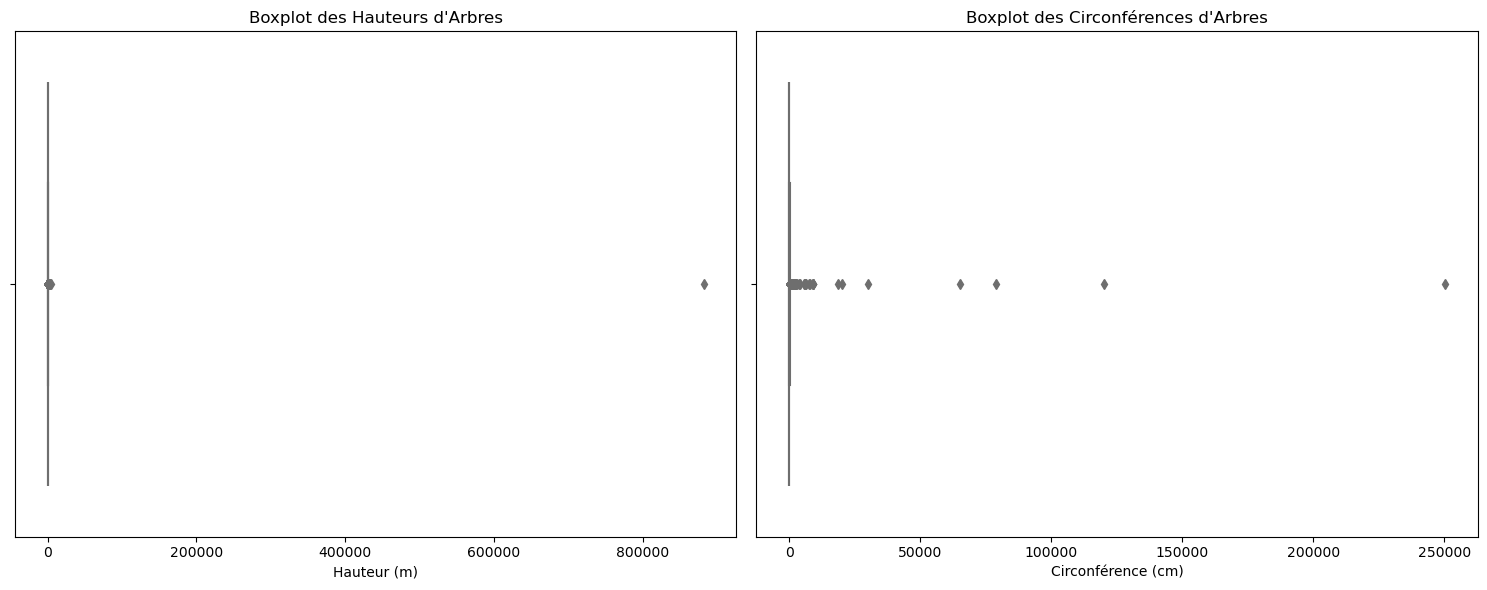

In [25]:
# Création de la figure
plt.figure(figsize=(15, 6))

# Création du boxplot pour la hauteur des arbres
plt.subplot(1, 2, 1)  # (1 ligne, 2 colonnes, premier plot)
sns.boxplot(x=data["hauteur_m"], color="skyblue")
plt.title("Boxplot des Hauteurs d'Arbres")
plt.xlabel("Hauteur (m)")

# Création du boxplot pour la circonférence des arbres
plt.subplot(1, 2, 2)  # (1 ligne, 2 colonnes, deuxième plot)
sns.boxplot(x=data["circonference_cm"], color="lightcoral")
plt.title("Boxplot des Circonférences d'Arbres")
plt.xlabel("Circonférence (cm)")

# Affichage de la figure
plt.tight_layout()
plt.show()

/tmp/ipykernel_660/2006444230.py:24: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


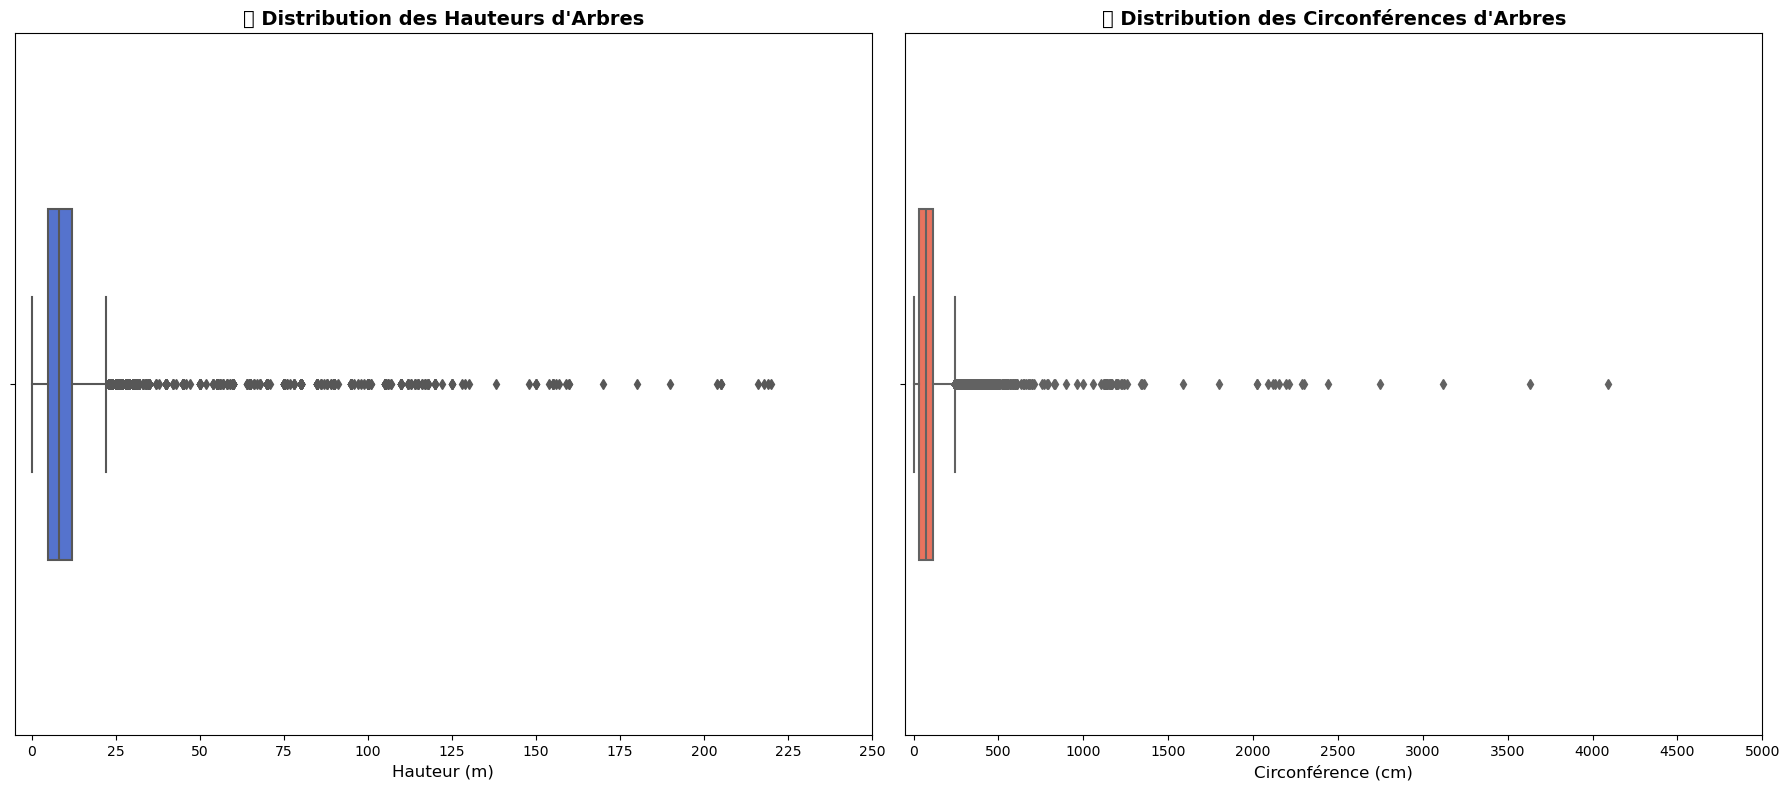

In [26]:
plt.figure(figsize=(18, 8))

# ✅ Boxplot pour la hauteur des arbres
plt.subplot(1, 2, 1)
sns.boxplot(x=data["hauteur_m"], color="royalblue", width=0.5, fliersize=5)
plt.title("📏 Distribution des Hauteurs d'Arbres", fontsize=14, fontweight="bold")
plt.xlabel("Hauteur (m)", fontsize=12)

# ✅ Ajustement des limites et des ticks
plt.xlim(-5, 250)  # Étendre l'axe jusqu'à 250 mètres
plt.xticks(range(0, 260, 25))  # Graduation tous les 25 mètres

# ✅ Boxplot pour la circonférence des arbres
plt.subplot(1, 2, 2)
sns.boxplot(x=data["circonference_cm"], color="tomato", width=0.5, fliersize=5)
plt.title("📏 Distribution des Circonférences d'Arbres", fontsize=14, fontweight="bold")
plt.xlabel("Circonférence (cm)", fontsize=12)

# ✅ Ajustement des limites et des ticks
plt.xlim(-50, 5000)  # Circonférence max toujours à 5000 cm
plt.xticks(range(0, 5500, 500))  # Graduation tous les 500 cm

# ✅ Ajustement du layout
plt.tight_layout()

# ✅ Affichage du graphique
plt.show()

In [27]:

# Détermination des bornes supérieures et inférieures pour la hauteur
born_inf_hauteur = 0  # Valeur minimale acceptable pour la hauteur
born_sup_hauteur = 40  # Valeur maximale acceptable pour la hauteur

# Détermination des bornes supérieures et inférieures pour la circonférence
born_inf_circonf = 0  # Valeur minimale acceptable pour la circonférence
born_sup_circonf = 700  # Valeur maximale acceptable pour la circonférence

# Filtrage des valeurs aberrantes dans la colonne 'hauteur_m'
outliers_hauteur = data[(data['hauteur_m'] < born_inf_hauteur) | (data['hauteur_m'] > born_sup_hauteur)]

# Filtrage des valeurs aberrantes dans la colonne 'circonference_cm'
outliers_circonf = data[(data['circonference_cm'] < born_inf_circonf) | (data['circonference_cm'] > born_sup_circonf)]

print("Nombre de valeurs aberrantes dans la colonne 'hauteur_m' :", len(outliers_hauteur))
print("Nombre de valeurs aberrantes dans la colonne 'circonference_cm' :", len(outliers_circonf))

Nombre de valeurs aberrantes dans la colonne 'hauteur_m' : 483
Nombre de valeurs aberrantes dans la colonne 'circonference_cm' : 82


In [28]:
# exemple d'un arbre à la valeur d'une hauteur aberrante
print(data.loc[5392, ['hauteur_m', 'circonference_cm']])

hauteur_m           1510
circonference_cm     100
Name: 5392, dtype: object


<span style="color:blue">Remplacement des valeurs aberrantes par NaN  :</span>

In [29]:
# Définition des bornes acceptables
born_inf_hauteur = 0
born_sup_hauteur = 40

born_inf_circonf = 0
born_sup_circonf = 700

# Remplacement des valeurs aberrantes par NaN dans la colonne 'hauteur_m'
data.loc[(data['hauteur_m'] < born_inf_hauteur) | (data['hauteur_m'] > born_sup_hauteur), 'hauteur_m'] = np.nan

# Remplacement des valeurs aberrantes par NaN dans la colonne 'circonference_cm'
data.loc[(data['circonference_cm'] < born_inf_circonf) | (data['circonference_cm'] > born_sup_circonf), 'circonference_cm'] = np.nan

# Vérification des résultats
print(data[['hauteur_m', 'circonference_cm']])

        hauteur_m  circonference_cm
0             5.0              20.0
1             8.0              65.0
2            10.0              90.0
3             8.0              60.0
4             0.0              38.0
...           ...               ...
200132        0.0               0.0
200133        0.0               0.0
200134        0.0               0.0
200135        0.0               0.0
200136        0.0               0.0

[200137 rows x 2 columns]


In [30]:
print("Nombre de valeurs aberrantes remplacées par NaN pour la hauteur :", data['hauteur_m'].isna().sum())
print("Nombre de valeurs aberrantes remplacées par NaN pour la circonférence :", data['circonference_cm'].isna().sum())

Nombre de valeurs aberrantes remplacées par NaN pour la hauteur : 483
Nombre de valeurs aberrantes remplacées par NaN pour la circonférence : 82


In [31]:
# verification de notre arbre à la valeur d'une hauteur aberrante si remplacé par NaN
print(data.loc[5392, ['hauteur_m', 'circonference_cm']])

hauteur_m             NaN
circonference_cm    100.0
Name: 5392, dtype: object


<span style="color:blue">Approche statistique (méthode interquartile) :</span>

In [32]:
# Calcul des quartiles Q1 et Q3 pour la hauteur et la circonférence
Q1_height = data['hauteur_m'].quantile(0.25)
Q3_height = data['hauteur_m'].quantile(0.75)

Q1_circumference = data['circonference_cm'].quantile(0.25)
Q3_circumference = data['circonference_cm'].quantile(0.75)

# Calcul de la plage interquartile (IQR)
IQR_height = Q3_height - Q1_height
IQR_circumference = Q3_circumference - Q1_circumference

# Définition des bornes interquartiles
iqr_lower_bound_height = Q1_height - 1.5 * IQR_height
iqr_upper_bound_height = Q3_height + 1.5 * IQR_height

iqr_lower_bound_circumference = Q1_circumference - 1.5 * IQR_circumference
iqr_upper_bound_circumference = Q3_circumference + 1.5 * IQR_circumference

# Définition des seuils fixes donnés par l'utilisateur
fixed_lower_bound_height = 0
fixed_upper_bound_height = 40

fixed_lower_bound_circumference = 0
fixed_upper_bound_circumference = 700

# Filtrer les valeurs aberrantes basées sur IQR et les seuils fixes
outliers_height = data[
    (data['hauteur_m'] < iqr_lower_bound_height) | (data['hauteur_m'] > iqr_upper_bound_height) |
    (data['hauteur_m'] < fixed_lower_bound_height) | (data['hauteur_m'] > fixed_upper_bound_height)
]

outliers_circumference = data[
    (data['circonference_cm'] < iqr_lower_bound_circumference) | (data['circonference_cm'] > iqr_upper_bound_circumference) |
    (data['circonference_cm'] < fixed_lower_bound_circumference) | (data['circonference_cm'] > fixed_upper_bound_circumference)
]

# Remplacement des valeurs aberrantes par NaN dans le DataFrame original
data.loc[outliers_height.index, 'hauteur_m'] = np.nan
data.loc[outliers_circumference.index, 'circonference_cm'] = np.nan

# Affichage du nombre de valeurs aberrantes
print("📊 Nombre de valeurs aberrantes dans la colonne 'hauteur_m' :", len(outliers_height))
print("📊 Nombre de valeurs aberrantes dans la colonne 'circonference_cm' :", len(outliers_circumference))

📊 Nombre de valeurs aberrantes dans la colonne 'hauteur_m' : 3420
📊 Nombre de valeurs aberrantes dans la colonne 'circonference_cm' : 3327


<span style="color:blue">D. Gestion des valeurs aberrantes : :</span>

<span style="color:blue">Maintenant que nous avons identifié les valeurs aberrantes dans les colonnes "hauteur m" et "circonférence" à l'aide des bornes supérieures et inférieures spécifiées, nous pouvons les nettoyer en les supprimant du DataFrame data. :</span>

In [33]:
# Filtrage des valeurs aberrantes dans la colonne 'hauteur_m'
data = data[(data['hauteur_m'] >= born_inf_hauteur) & (data['hauteur_m'] <= born_sup_hauteur)]

# Filtrage des valeurs aberrantes dans la colonne 'circonference_cm'
data = data[(data['circonference_cm'] >= born_inf_circonf) & (data['circonference_cm'] <= born_sup_circonf)]

# Affichage du DataFrame après nettoyage des valeurs aberrantes
data

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b,stade_complet
0,99874,Arbre,Jardin,PARIS 7E ARRDT,Non défini,Non défini,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,Non défini,20.0,5.0,Non spécifié,0.0,48.857620,2.320962,Non défini
1,99875,Arbre,Jardin,PARIS 7E ARRDT,Non défini,Non défini,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,Non défini,65.0,8.0,A,Non défini,48.857656,2.321031,Adulte
2,99876,Arbre,Jardin,PARIS 7E ARRDT,Non défini,Non défini,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,Non défini,90.0,10.0,A,Non défini,48.857705,2.321061,Adulte
3,99877,Arbre,Jardin,PARIS 7E ARRDT,Non défini,Non défini,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,Non défini,60.0,8.0,A,Non défini,48.857722,2.321006,Adulte
4,99878,Arbre,Jardin,PARIS 17E ARRDT,Non défini,Non défini,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,Non défini,38.0,0.0,Non spécifié,Non défini,48.890435,2.315289,Non défini
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,Non défini,Non défini,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,Non défini,Castanea,fargesii,Non défini,0.0,0.0,Non spécifié,0.0,48.821957,2.456264,Non défini
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,Non défini,Non défini,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,Non défini,0.0,0.0,Non spécifié,0.0,48.823254,2.457935,Non défini
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,Non défini,Non défini,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,Non défini,0.0,0.0,Non spécifié,0.0,48.822907,2.457970,Non défini
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,Non défini,Non défini,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,Non défini,0.0,0.0,Non spécifié,0.0,48.822522,2.455956,Non défini


In [34]:

# Détermination des bornes supérieures et inférieures pour la hauteur
born_inf_hauteur = 0  # Valeur minimale acceptable pour la hauteur
born_sup_hauteur = 40  # Valeur maximale acceptable pour la hauteur

# Détermination des bornes supérieures et inférieures pour la circonférence
born_inf_circonf = 0  # Valeur minimale acceptable pour la circonférence
born_sup_circonf = 700  # Valeur maximale acceptable pour la circonférence

# Filtrage des valeurs aberrantes dans la colonne 'hauteur_m'
outliers_hauteur = data[(data['hauteur_m'] < born_inf_hauteur) | (data['hauteur_m'] > born_sup_hauteur)]

# Filtrage des valeurs aberrantes dans la colonne 'circonference_cm'
outliers_circonf = data[(data['circonference_cm'] < born_inf_circonf) | (data['circonference_cm'] > born_sup_circonf)]

print("Nombre de valeurs aberrantes dans la colonne 'hauteur_m' :", len(outliers_hauteur))
print("Nombre de valeurs aberrantes dans la colonne 'circonference_cm' :", len(outliers_circonf))

Nombre de valeurs aberrantes dans la colonne 'hauteur_m' : 0
Nombre de valeurs aberrantes dans la colonne 'circonference_cm' : 0


In [35]:
print("Nombre de valeurs manquantes dans la colonne 'circonference_cm':", data['circonference_cm'].isnull().sum())
print("Nombre de valeurs manquantes dans la colonne 'hauteur_m':", data['hauteur_m'].isnull().sum())
print("Valeurs minimales et maximales pour la hauteur_m :", data['hauteur_m'].min(), "-", data['hauteur_m'].max())
print("Valeurs minimales et maximales pour la circonference_cm :", data['circonference_cm'].min(), "-", data['circonference_cm'].max())

Nombre de valeurs manquantes dans la colonne 'circonference_cm': 0
Nombre de valeurs manquantes dans la colonne 'hauteur_m': 0
Valeurs minimales et maximales pour la hauteur_m : 0.0 - 22.0
Valeurs minimales et maximales pour la circonference_cm : 0.0 - 242.0


<span style="color:blue">E. Detection des doublons : </span>

In [36]:
duplicates = data[data.duplicated()]

if len(duplicates) > 0:
    print("Notre jeu de données contient", len(duplicates), "doublon(s).")
else:
    print("Notre jeu de données ne contient pas de doublons.")

Notre jeu de données ne contient pas de doublons.


<span style="color:blue">5. ANALYSE UNIVARIEE ET REPRESENTATIONS GRAPHIQUE </span>

<span style="color:blue">Cette section vise à effectuer des analyses univariée et bivariée pour créer des représentations graphiques pour explorer les caractéristiques individuelles des données.</span>

<span style="color:blue">Analyse univariée :</span>pan>

<span style="color:blue">Pour que notre graphique soit suffisament preci nous allons deja faire la moyenne des circonferances afin de pouvoir adapter la precision de notre graphique.</span>

In [37]:
data['circonference_cm'].mean()

74.80328046309994

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


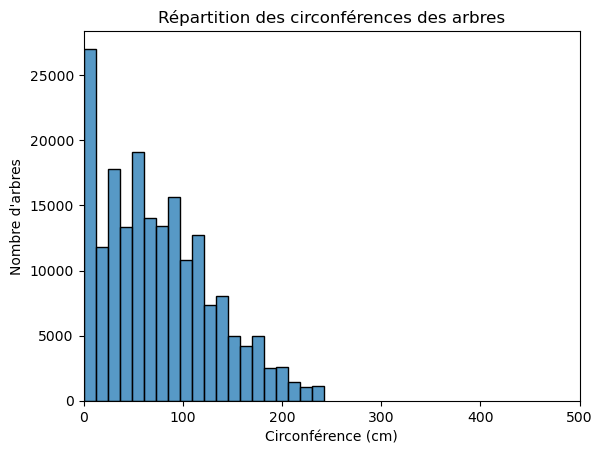

In [38]:
# Création de l'histogramme de circonférence avec Seaborn
sns.histplot(data=data, x="circonference_cm", bins=20)
plt.xlabel("Circonférence (cm)")
plt.ylabel("Nombre d'arbres")
plt.title("Répartition des circonférences des arbres")

# Ajustement des limites de l'axe x
plt.xlim(0, 500)

# Affichage de l'histogramme
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


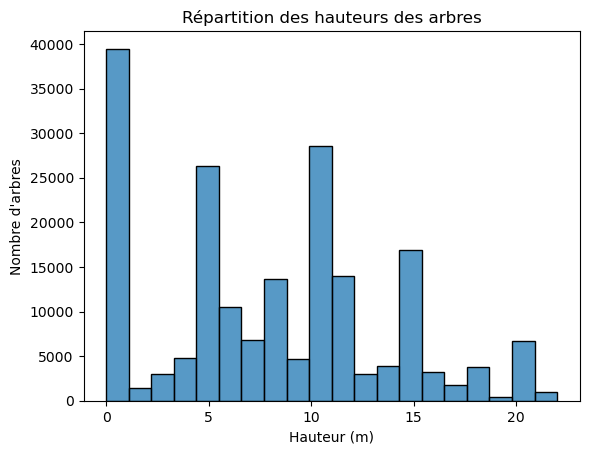

In [39]:
# Création de l'histogramme de hauteur_m avec Seaborn
sns.histplot(data=data, x="hauteur_m", bins=20, edgecolor='black')

# Ajout des labels et du titre
plt.xlabel("Hauteur (m)")
plt.ylabel("Nombre d'arbres")
plt.title("Répartition des hauteurs des arbres")

# Affichage de l'histogramme
plt.show()

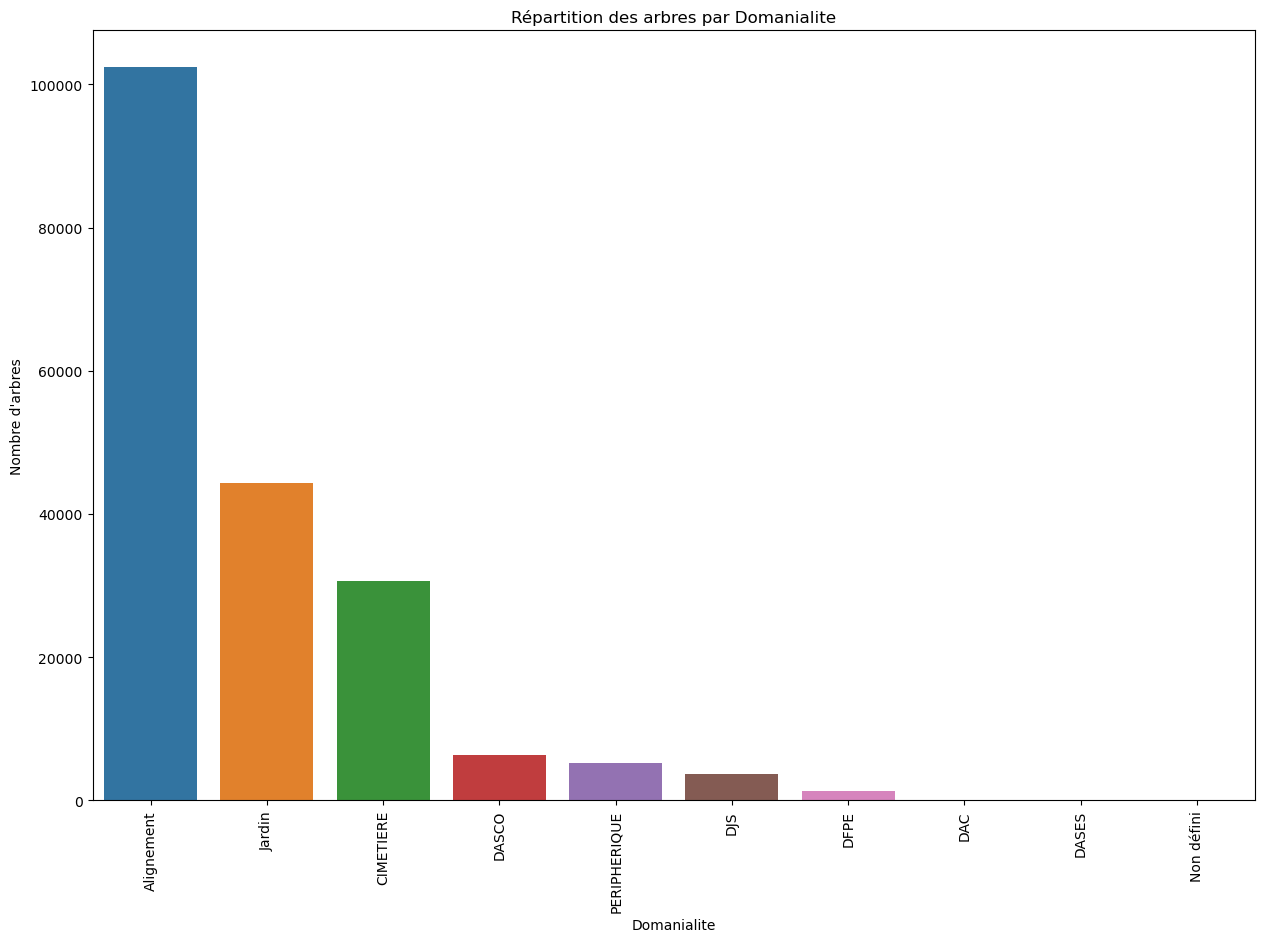

In [40]:
# Exploration des Domanialite
dims_fig = (15, 10)
plt.figure(figsize=dims_fig)
sns.countplot(data=data, x="domanialite", order=data["domanialite"].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel("Domanialite")
plt.ylabel("Nombre d'arbres")
plt.title("Répartition des arbres par Domanialite")
plt.show()

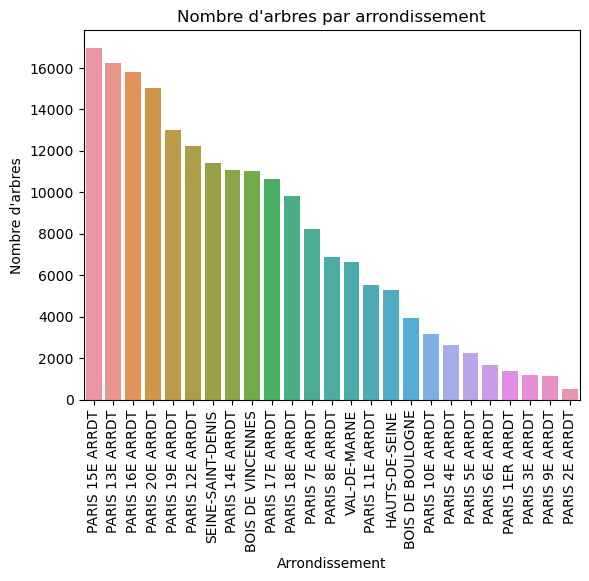

In [41]:
# Calcul du nombre d'arbres par arrondissement
counts = data['arrondissement'].value_counts()

# Création du diagramme à barres
sns.barplot(x=counts.index, y=counts.values)

# Ajout des labels et du titre
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres")
plt.title("Nombre d'arbres par arrondissement")

# Ajustement de l'orientation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Affichage du diagramme à barres
plt.show()

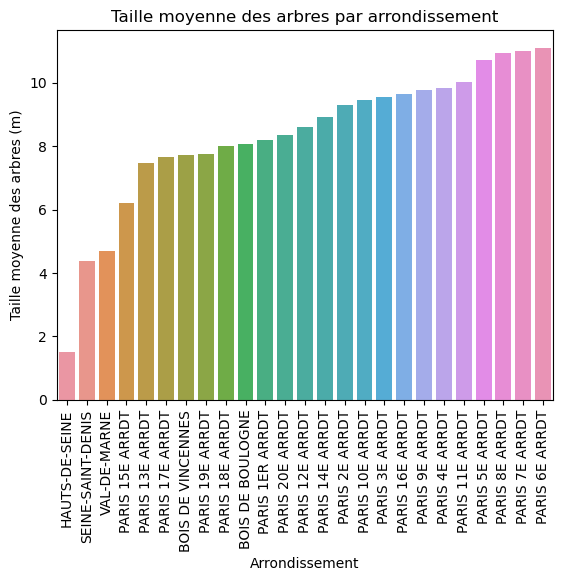

In [42]:
# Calcul de la taille moyenne des arbres par arrondissement
mean_heights = data.groupby('arrondissement')['hauteur_m'].mean()

# Tri des arrondissements par ordre croissant
mean_heights = mean_heights.sort_values()

# Création du diagramme en barres
sns.barplot(x=mean_heights.index, y=mean_heights.values)

# Ajout des labels et du titre
plt.xlabel("Arrondissement")
plt.ylabel("Taille moyenne des arbres (m)")
plt.title("Taille moyenne des arbres par arrondissement")

# Ajustement de l'orientation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Affichage du diagramme en barres
plt.show()

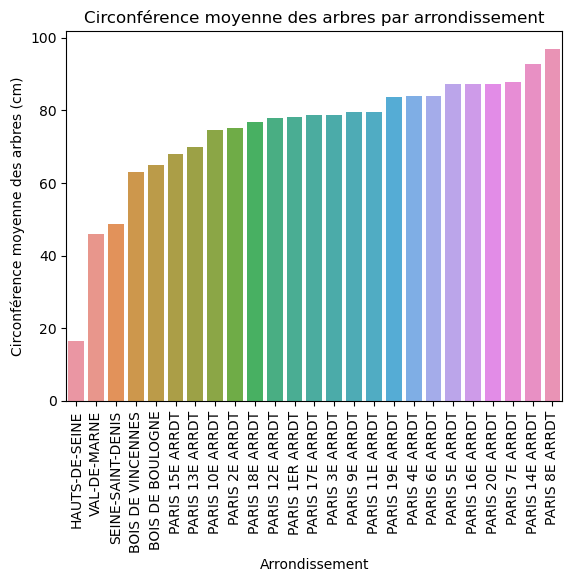

In [43]:
# Calcul de la circonférence moyenne des arbres par arrondissement
mean_circumferences = data.groupby('arrondissement')['circonference_cm'].mean()

# Tri des arrondissements par ordre croissant
mean_circumferences = mean_circumferences.sort_values()

# Création du diagramme en barres
sns.barplot(x=mean_circumferences.index, y=mean_circumferences.values)

# Ajout des labels et du titre
plt.xlabel("Arrondissement")
plt.ylabel("Circonférence moyenne des arbres (cm)")
plt.title("Circonférence moyenne des arbres par arrondissement")

# Ajustement de l'orientation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Affichage du diagramme en barres
plt.show()

<span style="color:blue">Analyse bivariée :</span>

In [44]:
# Sélection des colonnes pertinentes
arbres_selectionnes = data[['arrondissement', 'libelle_francais', 'espece']]

# Filtrage des données pour exclure les lignes avec des valeurs manquantes
arbres_filtres = arbres_selectionnes.dropna(subset=['arrondissement', 'libelle_francais', 'espece'])

# Opération d'agrégation pour compter le nombre d'arbres par combinaison d'arrondissement, libellé français et espèce
arbres_agreges = arbres_filtres.groupby(['arrondissement', 'libelle_francais', 'espece']).size().reset_index(name='count')

# Opération d'agrégation supplémentaire pour calculer le nombre total d'arbres par arrondissement
arbres_par_arrondissement = arbres_agreges.groupby('arrondissement')['count'].sum().reset_index(name='total')

# Jointure des deux DataFrames pour obtenir le pourcentage des espèces dans chaque arrondissement
pourcentages_especes = arbres_agreges.merge(arbres_par_arrondissement, on='arrondissement')
pourcentages_especes['percentage'] = (pourcentages_especes['count'] / pourcentages_especes['total']) * 100

In [45]:
def calcul_taux_especes(data, colonne_espece='espece'):
    """
    Calcule le taux en pourcentage des différentes espèces d'arbres dans le dataset.

    :param data: DataFrame contenant les données des arbres.
    :param colonne_espece: Nom de la colonne contenant les espèces d'arbres.
    :return: DataFrame avec les espèces et leur taux en pourcentage.
    """
    # Vérifier que la colonne existe
    if colonne_espece not in data.columns:
        raise ValueError(f"La colonne '{colonne_espece}' n'existe pas dans le dataset.")

    # Calcul du pourcentage des espèces
    taux_especes = (data[colonne_espece].value_counts(normalize=True) * 100).reset_index()
    taux_especes.columns = ['Espece', 'Pourcentage']
    
    return taux_especes

# Exemple d'utilisation
taux_par_espece = calcul_taux_especes(data)
print((taux_par_espece).head(10))

           Espece  Pourcentage
0     x hispanica    17.695634
1   hippocastanum     9.717161
2        japonica     6.055248
3          n. sp.     4.600071
4       tomentosa     4.551101
5  pseudoplatanus     3.758306
6     platanoides     3.224277
7           nigra     2.463956
8      x europaea     2.416017
9        x carnea     2.268076


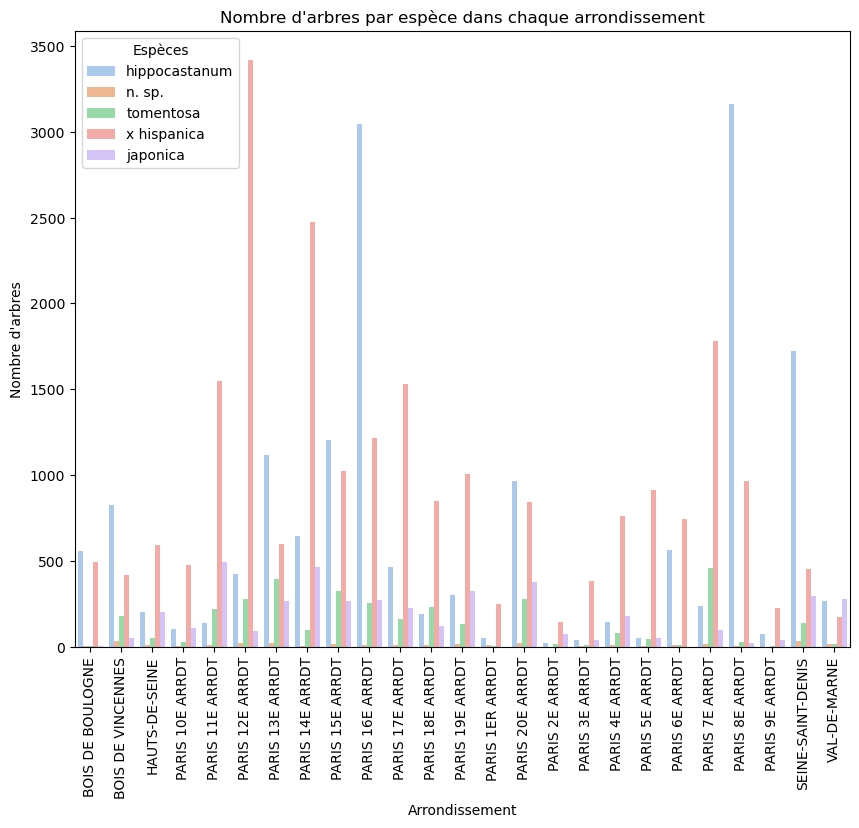

In [46]:
# Sélection des cinq espèces les plus courantes
top_5_especes = pourcentages_especes.groupby('espece')['count'].sum().nlargest(5).index

# Filtrage du DataFrame pour inclure seulement les cinq espèces les plus courantes
data_filtre = pourcentages_especes[pourcentages_especes['espece'].isin(top_5_especes)]
# Création du graphique en barres sans les barres d'intervalle de confiance
plt.figure(figsize=(10, 8))
sns.set_palette('pastel')
ax = sns.barplot(data=data_filtre, x='arrondissement', y='count', hue='espece', errorbar=None)
plt.title('Nombre d\'arbres par espèce dans chaque arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Nombre d\'arbres')
plt.legend(title='Espèces', loc='best')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Affichage des noms des arrondissements à la verticale
plt.show()

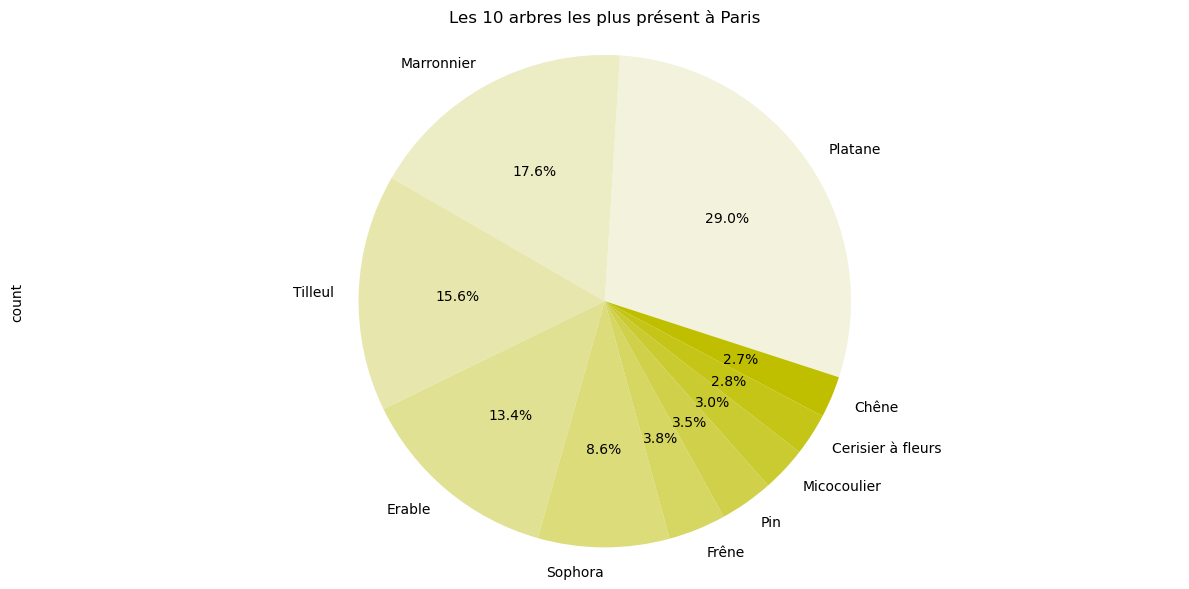

In [47]:
top_10_arbre = data["libelle_francais"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_arbre.plot(kind = "pie", autopct = "%1.1f%%", startangle = 342, colors=sns.color_palette("light:y", 10))

plt.title("Les 10 arbres les plus présent à Paris")
plt.axis("equal")
plt.tight_layout()

plt.show()

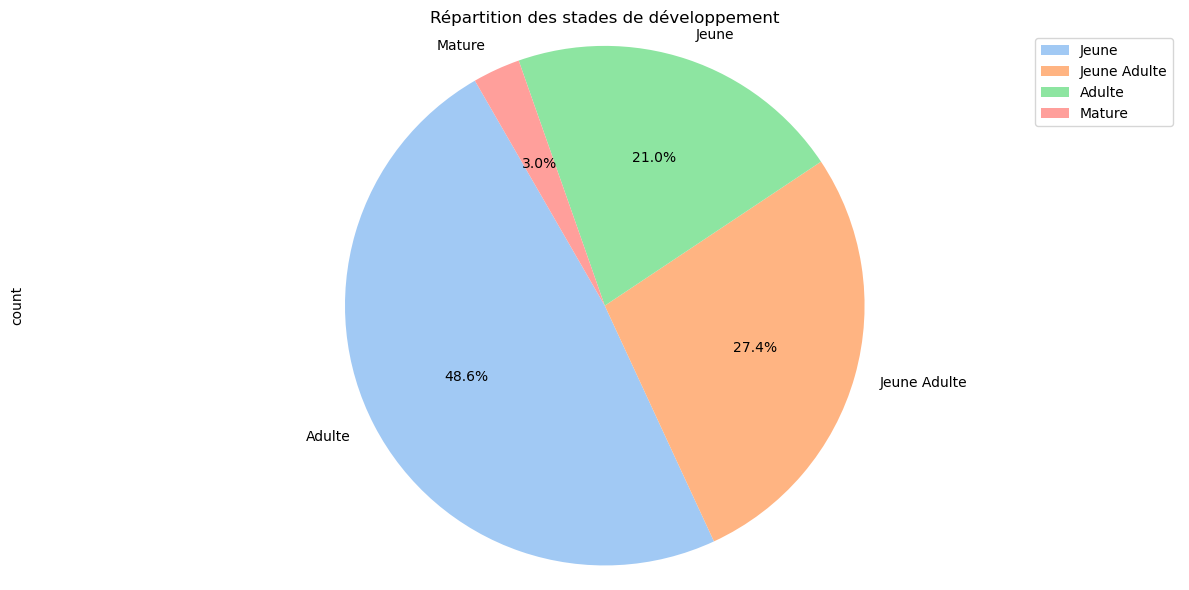

In [48]:
# Filtrer les valeurs "Non spécifié"
data_filtre = data[data["stade_developpement"] != "Non spécifié"]

# Remplacement des abréviations par des termes lisibles
dev_arbre_rename = data_filtre["stade_developpement"].replace({
    "J": "Jeune",
    "JA": "Jeune Adulte",
    "A": "Adulte",
    "M": "Mature"
})

# Calcul de la répartition
dev_arbre = dev_arbre_rename.value_counts()

# Création du graphique
plt.figure(figsize=(12, 6))
dev_arbre.plot(kind="pie", autopct="%1.1f%%", startangle=120, labels=dev_arbre.index)
legend_dev = ["Jeune", "Jeune Adulte", "Adulte", "Mature"]

plt.title("Répartition des stades de développement")
plt.axis("equal")
plt.legend(labels=legend_dev, bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Visualisation de la correlation entre la hauteur et le stade de developpement')

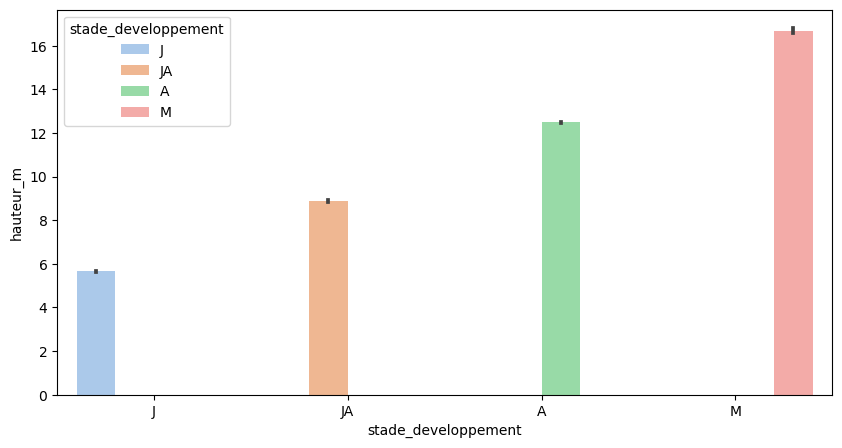

In [49]:
# Correlation entre la hauteur et le stade de developpement
fig = plt.figure(figsize=(10,5))
sns.barplot(
    x="stade_developpement",
    y="hauteur_m",
    data=data,
    hue="stade_developpement",
    hue_order=["J", "JA", "A", "M"],
    order=["J", "JA", "A", "M"])
ax.set_title("Visualisation de la correlation entre la hauteur et le stade de developpement", fontsize=16)

Text(0.5, 1.0, 'Visualisation géographique des arbres à Paris')

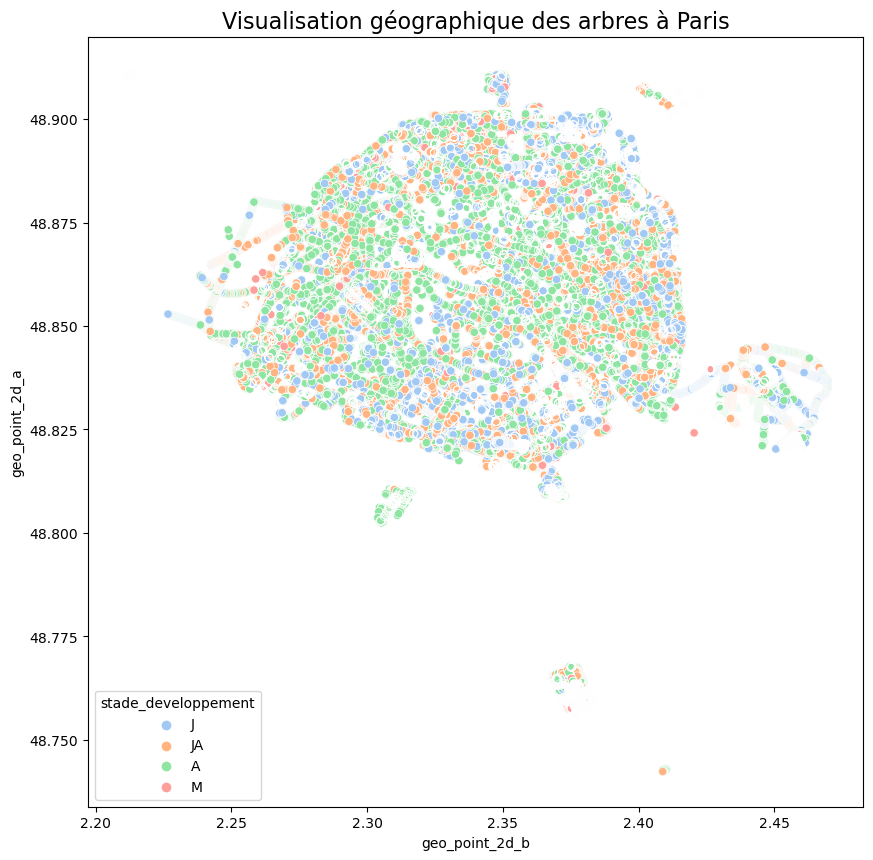

In [50]:
# Aperçu des position gps et de la répartition des arbres
fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=data,
                x="geo_point_2d_b",
                y="geo_point_2d_a",
                hue="stade_developpement",
                hue_order=["J", "JA","A", "M"])
ax.set_title("Visualisation géographique des arbres à Paris", fontsize=16)

In [51]:
arbre_remarquable = data[data["remarquable"] ==1]["remarquable"].count()
nb_arbre_remarquable = data.id.count()
print(f"Paris compte {arbre_remarquable} arbres remarquable, ce qui correspond à", round(arbre_remarquable/nb_arbre_remarquable * 100,2), "% du nombre d'arbres dans nos données")

Paris compte 78 arbres remarquable, ce qui correspond à 0.04 % du nombre d'arbres dans nos données


In [52]:
# Comparaison des hauteurs
hauteur_stats = data.groupby("remarquable")["hauteur_m"].describe()
print("📏 Statistiques des hauteurs des arbres :\n", hauteur_stats)

# Comparaison des circonférences
circonf_stats = data.groupby("remarquable")["circonference_cm"].describe()
print("📏 Statistiques des circonférences des arbres :\n", circonf_stats)

📏 Statistiques des hauteurs des arbres :
                 count       mean       std  min   25%   50%   75%   max
remarquable                                                            
0.0          132085.0   9.294515  5.108464  0.0   5.0   9.0  13.0  22.0
1.0              78.0  12.807692  4.789213  3.0  10.0  13.5  16.0  22.0
Non défini    61834.0   4.994453  5.805701  0.0   0.0   3.0  10.0  22.0
📏 Statistiques des circonférences des arbres :
                 count        mean        std   min    25%    50%     75%  \
remarquable                                                                
0.0          132085.0   82.711852  52.785441   0.0   40.0   75.0  115.00   
1.0              78.0  162.756410  48.948206  30.0  127.0  165.0  202.25   
Non défini    61834.0   57.798654  56.854585   0.0    0.0   47.0   95.00   

               max  
remarquable         
0.0          242.0  
1.0          242.0  
Non défini   242.0  


In [53]:
# Filtrer les arbres remarquables
arbres_remarquables = data[data["remarquable"] == 1]

# Extraction et affichage des ID pour les arbres remarquables
id_arbre_remarquable = arbres_remarquables["id"]
print("Les IDs des arbres remarquables sont :")
print(id_arbre_remarquable.tolist())

# Exportation en fichier excel
#id_arbre_remarquable.to_excel("Arbre Remarquable.xlsx")

Les IDs des arbres remarquables sont :
[103916, 104839, 106714, 106715, 107079, 107696, 108183, 108277, 109016, 110444, 111640, 111642, 112222, 113571, 113597, 114452, 114685, 114779, 114867, 114869, 116020, 116216, 118790, 120016, 120530, 121940, 123071, 123156, 123330, 123805, 123848, 125046, 125051, 125063, 125087, 126662, 128372, 128373, 132669, 134435, 135415, 136305, 136323, 136338, 136446, 136448, 136460, 136739, 138456, 138935, 139108, 140495, 155788, 155948, 158456, 158457, 158609, 230281, 235972, 249445, 267663, 307558, 2002353, 2002354, 2002355, 2002358, 2002359, 2002360, 2002361, 2002362, 2002379, 2002380, 2002388, 2002390, 2002391, 2002393, 2013640, 2017817]


Text(0.5, 1.0, 'Arbres remarquables')

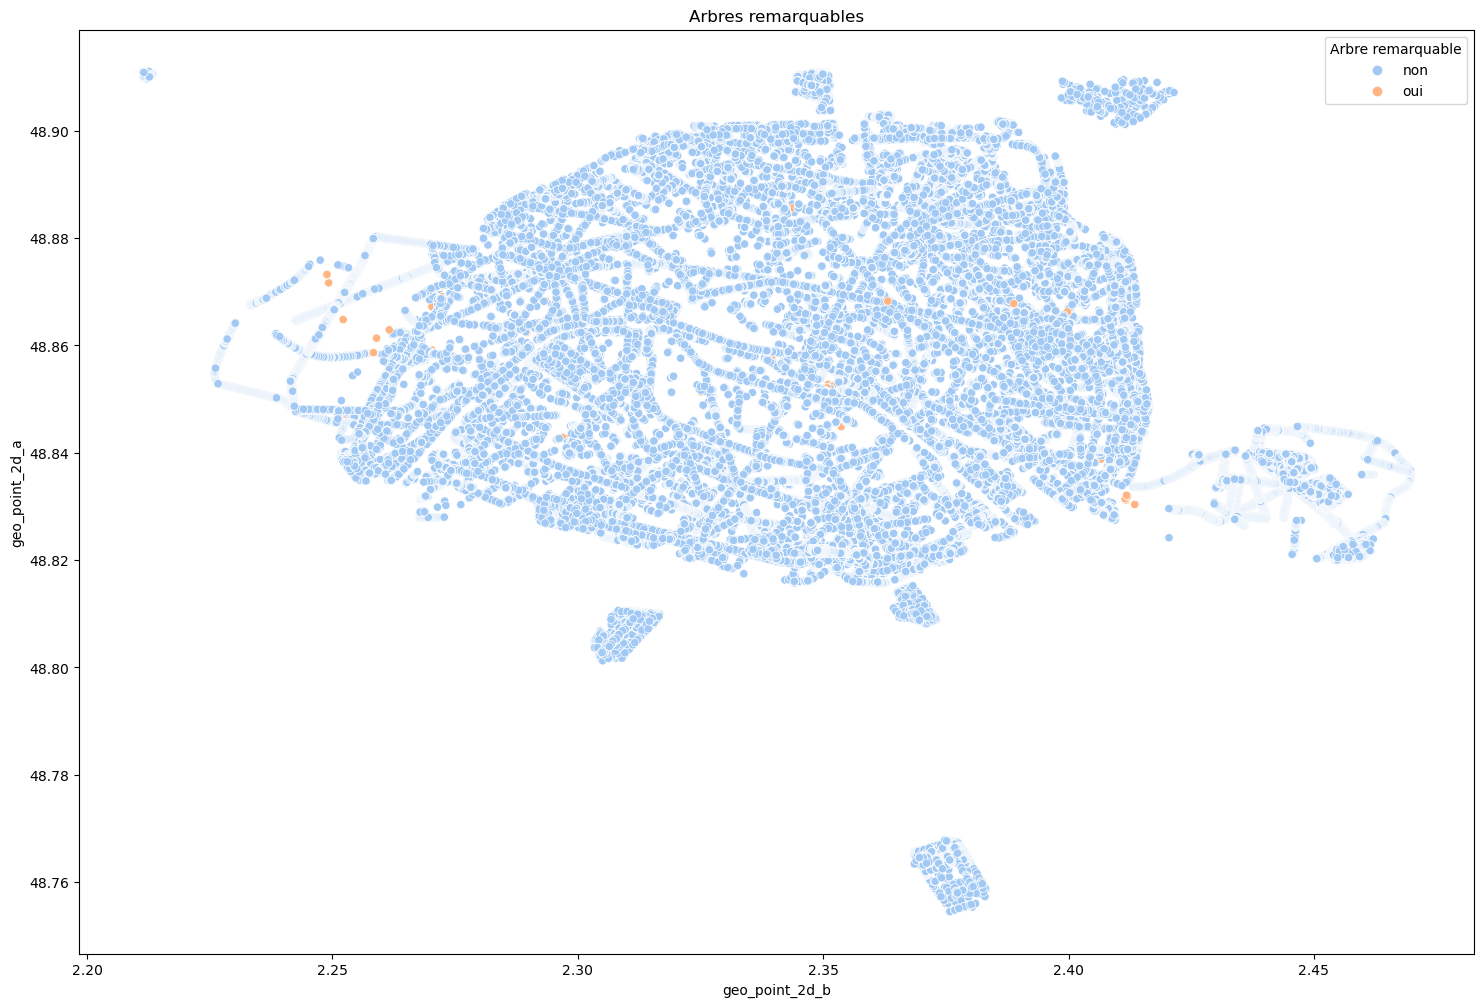

In [54]:
# Ajout d'une colonne pour simplifier la lecture
data["Arbre remarquable"] = data["remarquable"].map({0: "non", 1: "oui"})

# Position des arbres remarquable a Paris
plt.figure(figsize = (18, 12))
geo = sns.scatterplot(data = data,
                      x = "geo_point_2d_b", 
                      y = "geo_point_2d_a", 
                      hue = "Arbre remarquable")
plt.title("Arbres remarquables")

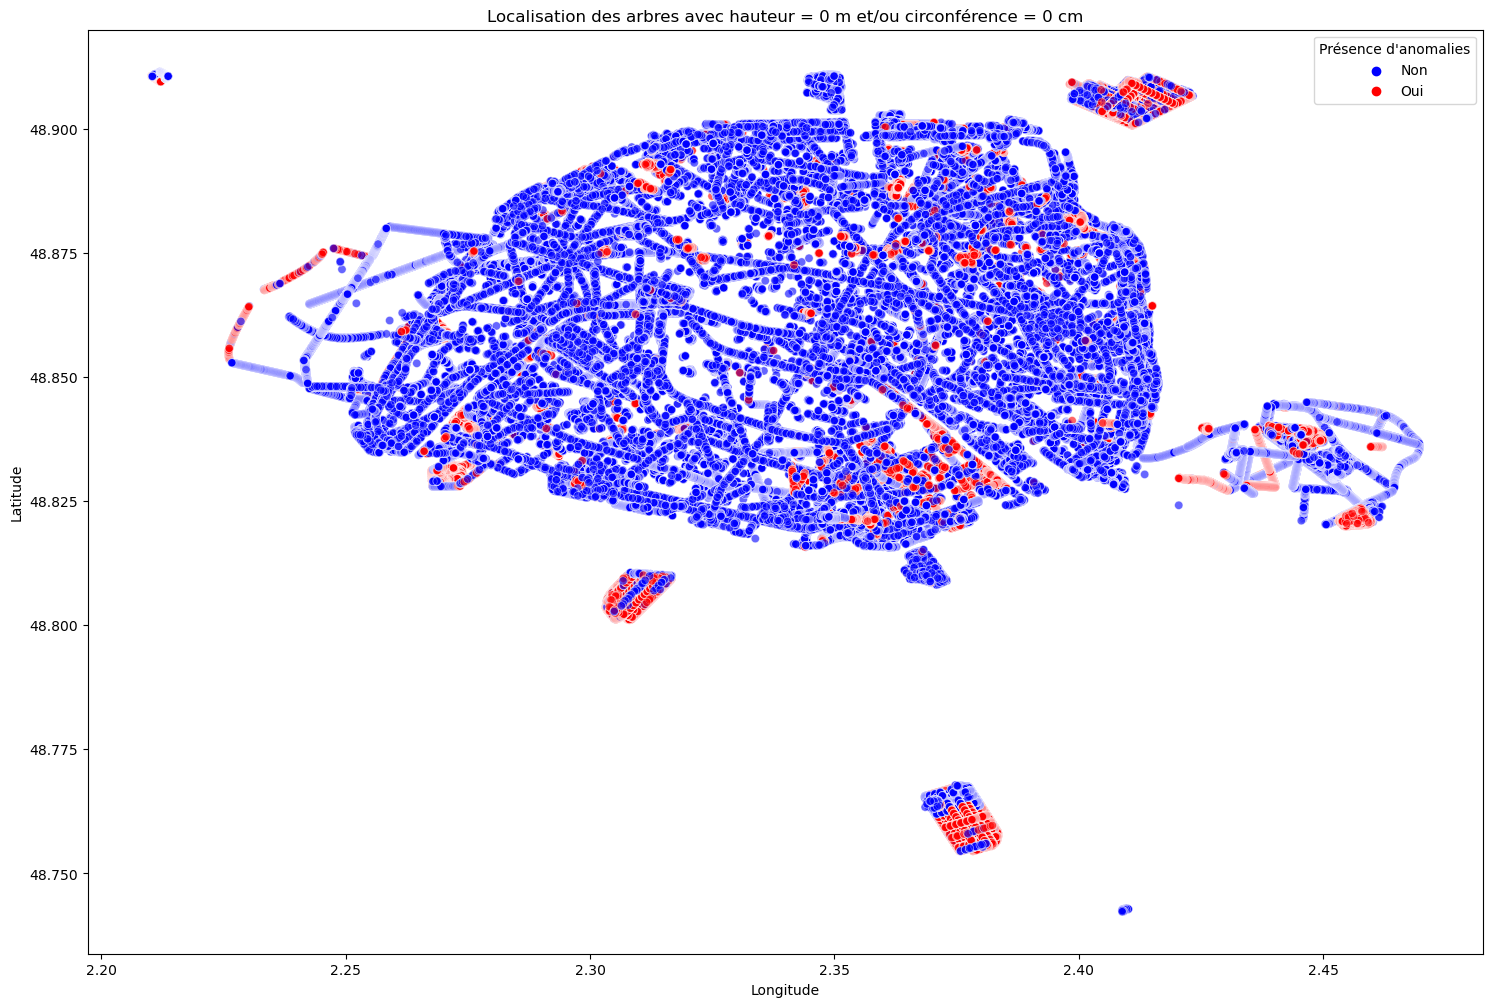

In [55]:
# Filtrer les arbres ayant une hauteur = 0 ou une circonférence = 0
arbres_zero = data[(data["hauteur_m"] == 0) | (data["circonference_cm"] == 0)]

# Ajouter une colonne pour indiquer la présence de valeurs nulles
data["Hauteur/Circonférence = 0"] = ((data["hauteur_m"] == 0) | (data["circonference_cm"] == 0)).map({False: "Non", True: "Oui"})

# Affichage de la carte
plt.figure(figsize=(18, 12))
geo = sns.scatterplot(
    data=data,
    x="geo_point_2d_b",
    y="geo_point_2d_a",
    hue="Hauteur/Circonférence = 0",
    palette={"Oui": "red", "Non": "blue"},  # Rouge pour les anomalies, bleu pour le reste
    alpha=0.6
)

plt.title("Localisation des arbres avec hauteur = 0 m et/ou circonférence = 0 cm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Présence d'anomalies")
plt.show()